In [1]:
import os

import numpy as np
import hist

import matplotlib as mpl

import sys
top_dir = '/afs/crc.nd.edu/user/a/atownse2/Public/RSTriPhoton/'
sys.path.append(top_dir)

from analysis.utils import sample_info as si

from analysis.utils import histograms as h
from analysis.workflows import explore

from analysis.utils import plotting as p
%matplotlib widget

import importlib

plot_dir = top_dir +'/plots/signal/'

In [2]:
importlib.reload(h)
importlib.reload(explore)

hists = h.get_hists('signal', workflow='explore')

Getting histograms for signal 2018 FlatAODv3 explore
Histograms do not exist, creating them now


Output()

Output()

/afs/crc.nd.edu/user/a/atownse2/micromamba/envs/triphoton-env/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


/afs/crc.nd.edu/user/a/atownse2/micromamba/envs/triphoton-env/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


/afs/crc.nd.edu/user/a/atownse2/micromamba/envs/triphoton-env/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


/afs/crc.nd.edu/user/a/atownse2/micromamba/envs/triphoton-env/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


[140, 160, 180, 250, 500, 1000, 3000]
[0.0025, 0.005, 0.01, 0.02, 0.04]


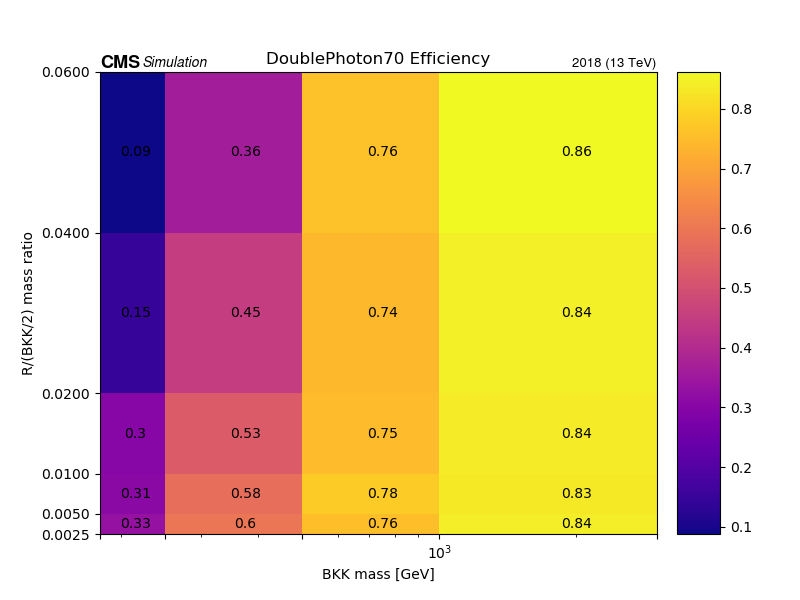

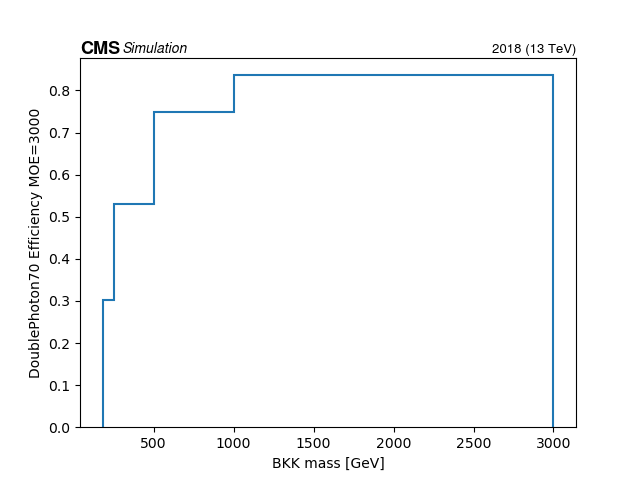

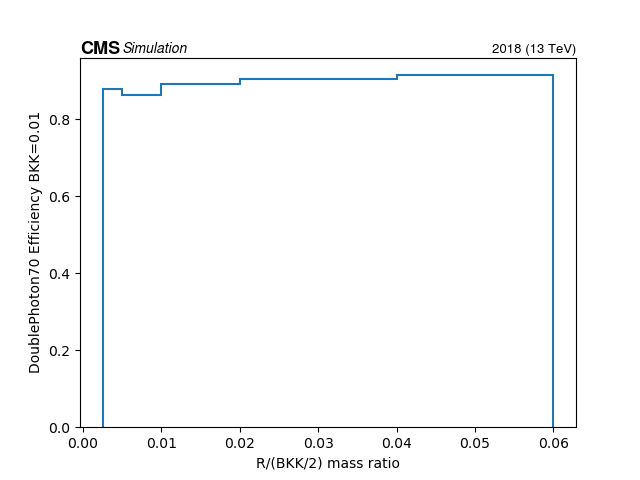

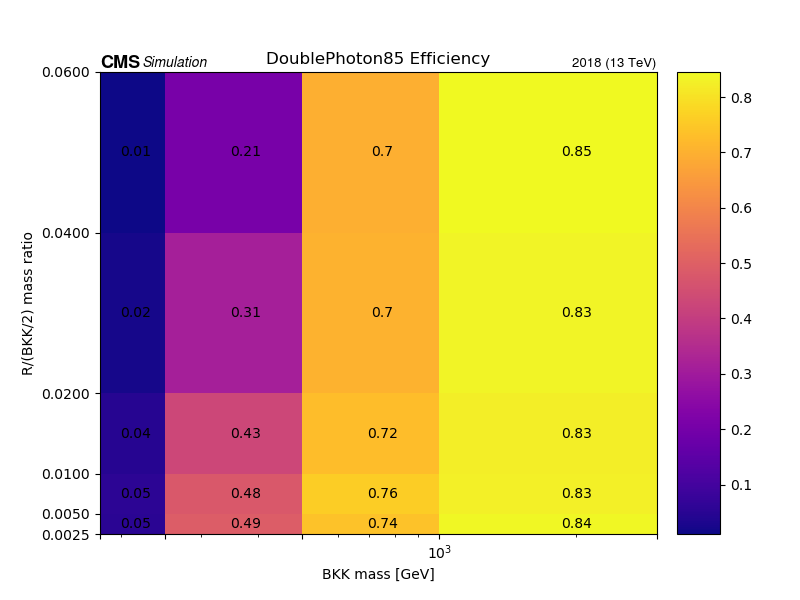

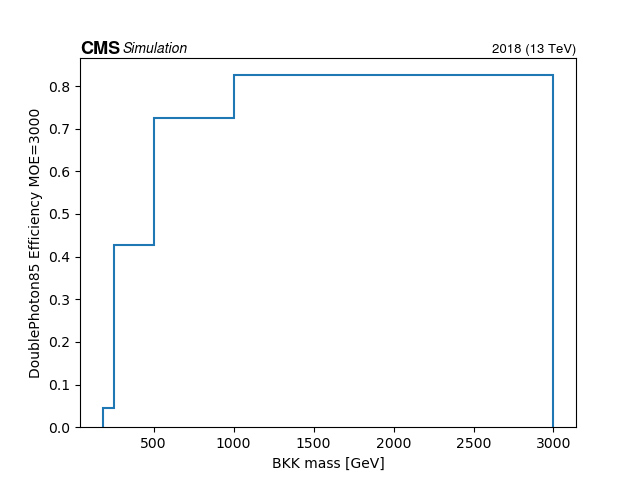

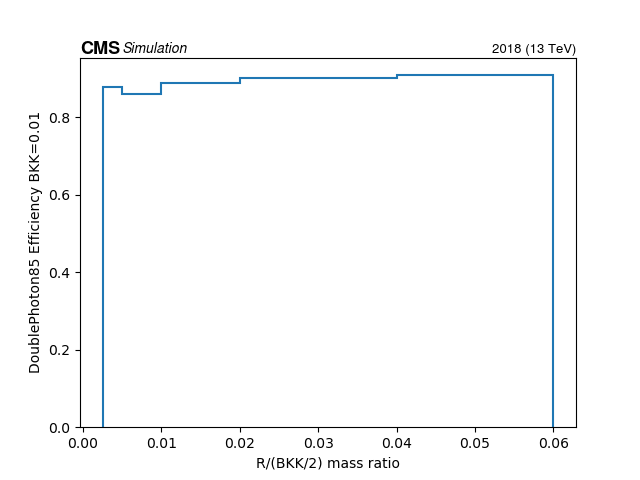

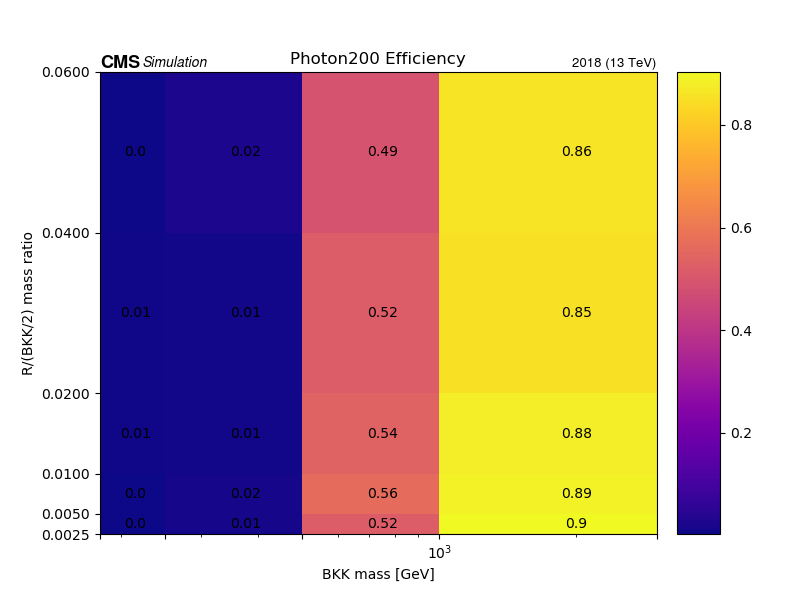

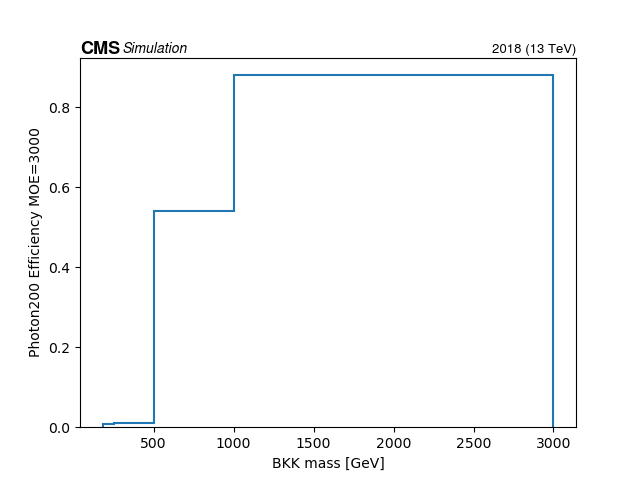

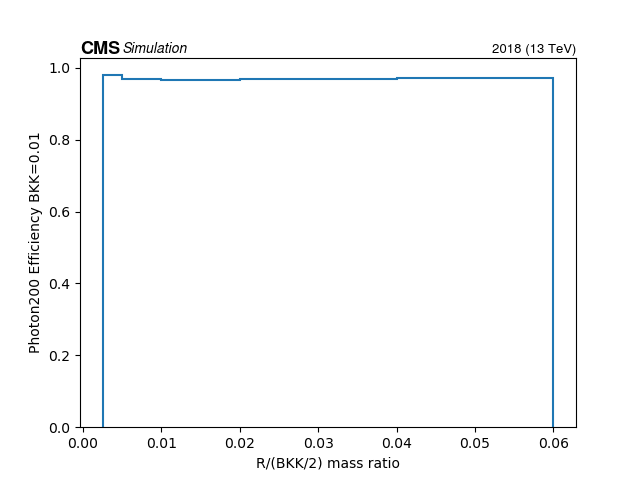

In [5]:
#Make 2D plot of signal trigger efficiency

bkk_masses = si.BKK_MASS
moes = si.MOES

bkk_masses.sort()
moes.sort()

bkk_bins = bkk_masses + [bkk_masses[-1]+(bkk_masses[-1]-bkk_masses[-2])]
moe_bins = moes + [moes[-1]+(moes[-1]-moes[-2])]

print(bkk_masses)
print(moes)

bkk_axis = hist.axis.Variable(bkk_bins[2:-1], name='BKK_mass', label='BKK mass [GeV]')
moe_axis = hist.axis.Variable(moe_bins[:], name='MOE', label='R/(BKK/2) mass ratio')

triggers = ['DoublePhoton70', 'DoublePhoton85', 'Photon200']

h2ds = {}
for trigger in triggers:
    h2ds[trigger] = hist.Hist(
        bkk_axis,
        moe_axis,
        name=f'Signal {trigger} Efficiency',)

h1ds_bkk = {}
for trigger in triggers:
    h1ds_bkk[trigger] = hist.Hist(
        bkk_axis,
        name=f'Signal {trigger} Efficiency',)

h1ds_moe = {}
for trigger in triggers:
    h1ds_moe[trigger] = hist.Hist(
        moe_axis,
        name=f'Signal {trigger} Efficiency',)

bkk_const = 3000
moe_const = 0.01
for mass_point, info in datasets.items():
    cutflow = info['hists']['cutflow']

    M_BKK, M_R = mass_point
    MOE = M_R/(M_BKK/2)

    for trigger in triggers:
        e = cutflow[f'trigger_{trigger}']/cutflow['all events']
        h2ds[trigger].fill(
            BKK_mass=M_BKK,
            MOE=MOE,
            weight=e
        )
        if moe_const == MOE:
            h1ds_bkk[trigger].fill(
                BKK_mass=M_BKK,
                weight=e
            )
        if bkk_const == M_BKK:
            h1ds_moe[trigger].fill(
                MOE=MOE,
                weight=e
            )


#Plotting
importlib.reload(p)
# cmap = mpl.colors.ListedColormap(['white']+mpl.cm.plasma(np.linspace(0.0,1.0,256)).tolist()) # If I want to include white space around the plot
cmap = mpl.cm.plasma
for trigger in triggers:
    p.plot2d(h2ds[trigger], cmap=cmap, title=f'{trigger} Efficiency', xticks=bkk_bins, yticks=moe_bins, setlogx=True, display_bin_vales=True, save_as=plot_dir+f'2d_signal_{trigger}_efficiency.png')
    p.plot1d(h1ds_bkk[trigger], ylabel=f'{trigger} Efficiency MOE={bkk_const}', save_as=plot_dir+f'1d_signal_{trigger}_efficiency_moe.png')
    p.plot1d(h1ds_moe[trigger], ylabel=f'{trigger} Efficiency BKK={moe_const}', save_as=plot_dir+f'1d_signal_{trigger}_efficiency_bkk.png')

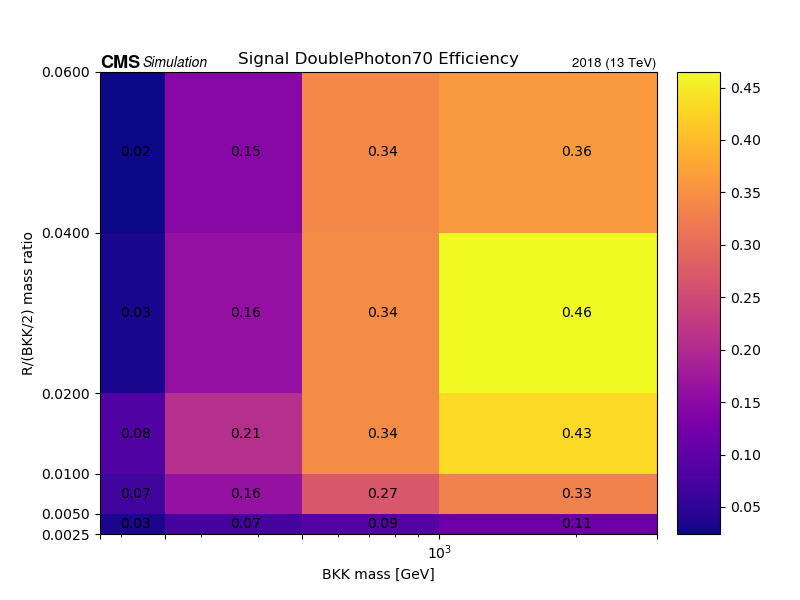

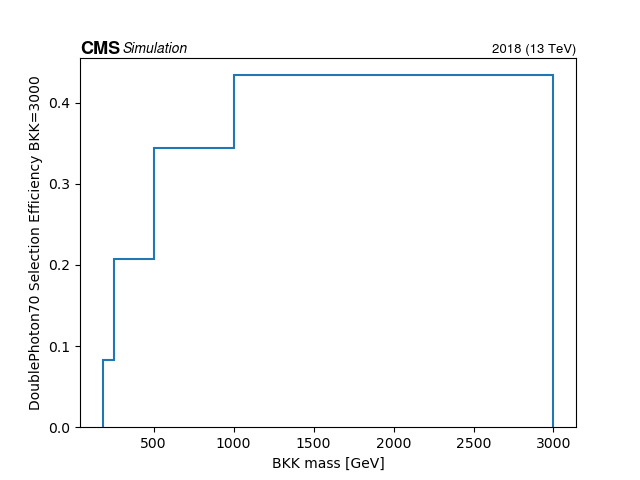

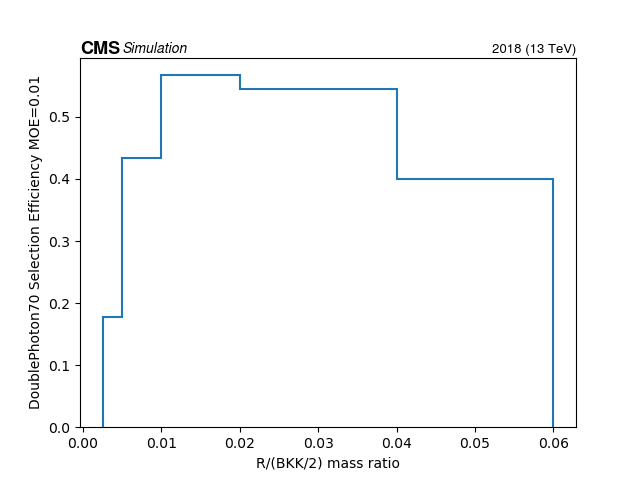

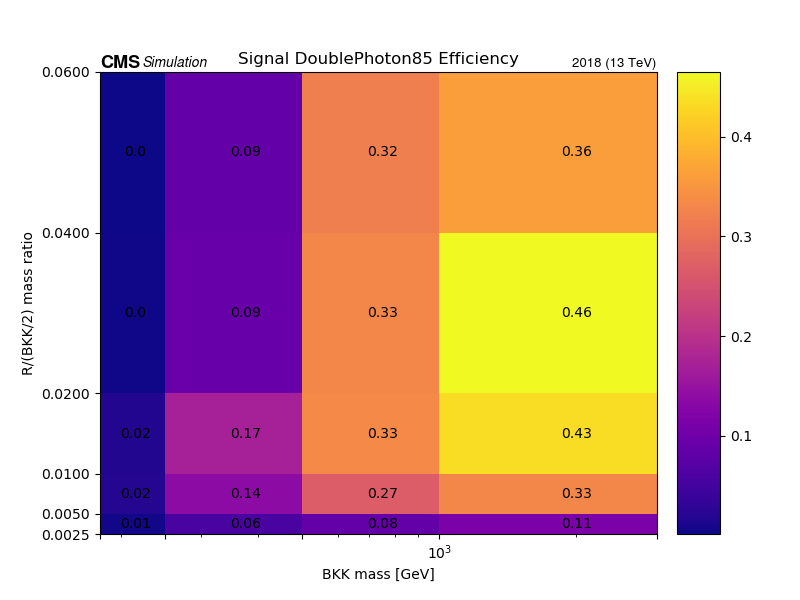

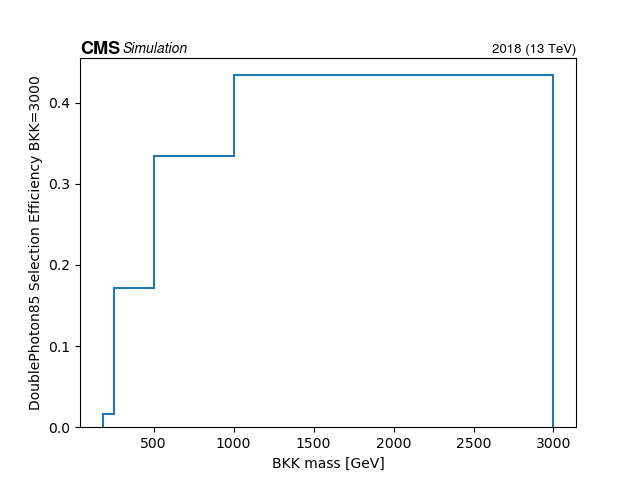

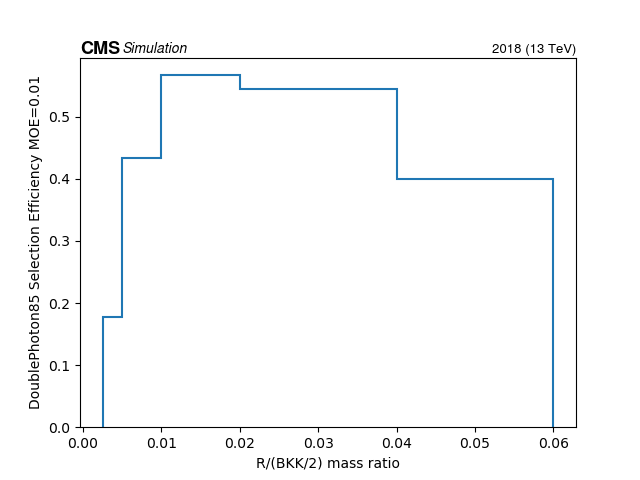

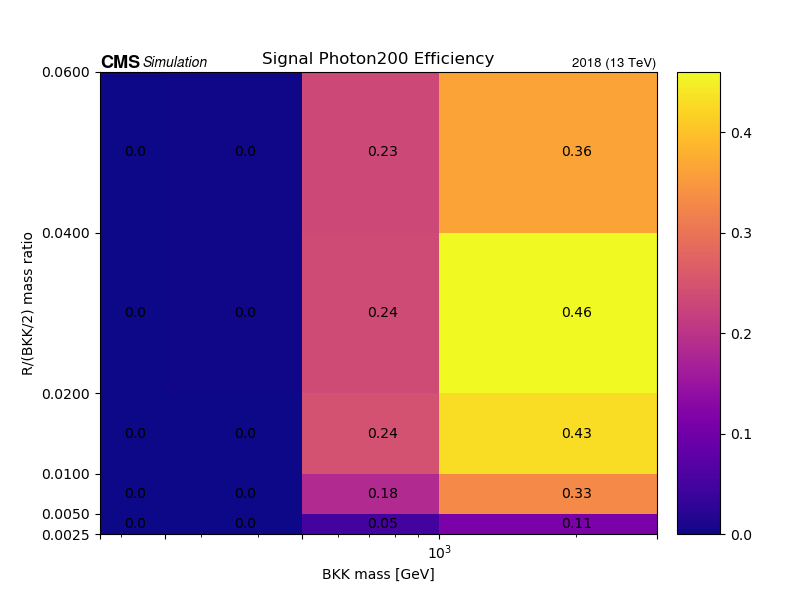

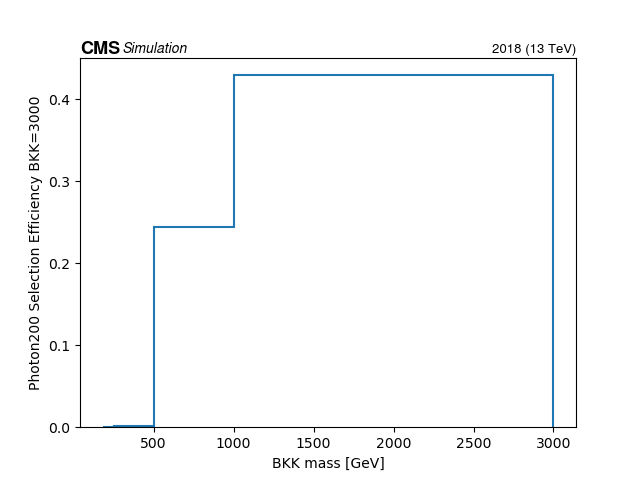

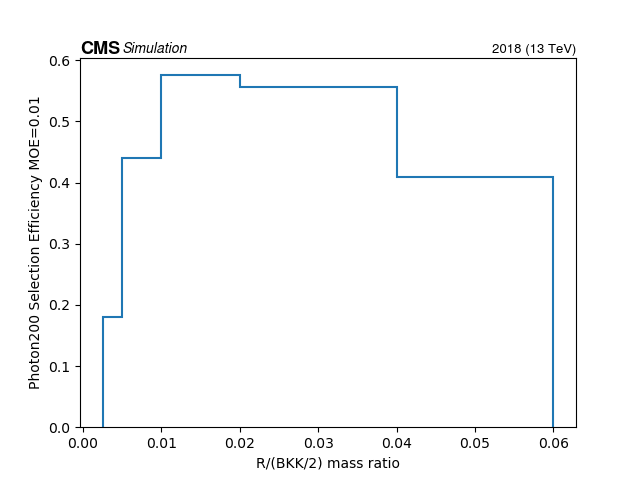

In [6]:
triggers = ['DoublePhoton70', 'DoublePhoton85', 'Photon200']

h2ds = {}
for trigger in triggers:
    h2ds[trigger] = hist.Hist(
        bkk_axis,
        moe_axis,
        name=f'Signal {trigger} Efficiency',)

h1ds_bkk = {}
for trigger in triggers:
    h1ds_bkk[trigger] = hist.Hist(
        bkk_axis,
        name=f'Signal {trigger} Efficiency',)

h1ds_moe = {}
for trigger in triggers:
    h1ds_moe[trigger] = hist.Hist(
        moe_axis,
        name=f'Signal {trigger} Efficiency',)

bkk_const = 3000
moe_const = 0.01

for mass_point, info in datasets.items():
    cutflow = info['hists']['cutflow']

    M_BKK, M_R = mass_point
    MOE = M_R/(M_BKK/2)

    for trigger in triggers:
        e = cutflow[f'pass_preselection_{trigger}']/cutflow['all events']
        info[f'selection_efficiency_{trigger}'] = e
        h2ds[trigger].fill(
            BKK_mass=M_BKK,
            MOE=MOE,
            weight=e
        )
        if moe_const == MOE:
            h1ds_bkk[trigger].fill(
                BKK_mass=M_BKK,
                weight=e
            )
        if bkk_const == M_BKK:
            h1ds_moe[trigger].fill(
                MOE=MOE,
                weight=e
            )


#Plotting
importlib.reload(p)
# cmap = mpl.colors.ListedColormap(['white']+mpl.cm.plasma(np.linspace(0.0,1.0,256)).tolist()) # If I want to include white space around the plot
cmap = mpl.cm.plasma
for trigger in triggers:
    p.plot2d(h2ds[trigger], cmap=cmap, title=f'Signal {trigger} Efficiency', xticks=bkk_bins, yticks=moe_bins, setlogx=True, display_bin_vales=True, save_as=plot_dir+f'2d_signal_{trigger}_selection_efficiency.png')
    p.plot1d(h1ds_bkk[trigger],  ylabel=f'{trigger} Selection Efficiency BKK={bkk_const}', save_as=plot_dir+f'1d_signal_{trigger}_selection_efficiency_moe.png')
    p.plot1d(h1ds_moe[trigger],  ylabel=f'{trigger} Selection Efficiency MOE={moe_const}', save_as=plot_dir+f'1d_signal_{trigger}_selection_efficiency_bkk.png')


In [7]:
# Save datasets dict
import pickle
with open(top_dir+'pkl/signal_datasets.pkl', 'wb') as f:
    pickle.dump(datasets, f)

In [ ]:
importlib.reload(p)
# Plot some kinematic variables
points = [(500.0, 2.5)]

for point in points:
    hists = datasets[point]['hists']
    p.plot1d(hists['photon_pt'], title='Signal Photon Candidates', save_as=plot_dir+'signal_photon_pt.png')
    p.plot1d(hists['photon_energy'], title='Signal Photon Candidates', xlim=(0,500), save_as=plot_dir+'signal_photon_energy.png')

In [15]:
#Estimate number of events needed in MC request using above signal efficiency
n_after_cuts = 2500

from analysis.metadata.mass_grid import mass_grid_mc_request, BKK_MASS_MC_REQUEST, MOE_MC_REQUEST

#Store number of events needed for each point in mass grid in a histogram
import pandas as pd
df = pd.DataFrame(index=MOE_MC_REQUEST, columns=BKK_MASS_MC_REQUEST)

n_total_events = 0
for point in mass_grid_mc_request:
    #Find closest point in mass grid
    M_BKK, M_R = point
    MOE = M_R/(M_BKK/2)

    #Find closest point in signal efficiency plot
    bkk_bin = np.digitize(M_BKK, bkk_bins)
    moe_bin = np.digitize(MOE, moe_bins)

    #Find signal efficiency at this point
    e = h2d_signal_efficiency.values()[bkk_bin-1, moe_bin-1]

    #Find number of events needed in MC request rounded up to nearest 1000
    n = n_after_cuts/e
    n = int(np.ceil(n/10000)*10000)

    n_total_events += n
    
    #Fill pandas df
    df.loc[MOE, M_BKK] = n
    #print(f'Number of events needed for {point}: {n:.0f}')

print(df)
print(f'Total number of events needed: {n_total_events}')

#Dump to json in mc_request dir
mc_request_dir = master_path+'mc_request/'
df.to_json(mc_request_dir+'n_events.json', indent=4)

         200    250    500    750    1000   1500   2000   2500   3000
0.0050  40000  20000  10000  10000  10000  10000  10000  10000  10000
0.0075  40000  20000  10000  10000  10000  10000  10000  10000  10000
0.0100  30000  20000  10000  10000  10000  10000  10000  10000  10000
0.0250  40000  20000  10000  10000  10000  10000  10000  10000  10000
0.0400  30000  20000  10000  10000  10000  10000  10000  10000  10000
Total number of events needed: 630000
